# PHYS20762 - Project 2: Exploring the effect of numerical integration techniques on differential equations

# The Damped Harmonic Oscillator

Student ID: 10630618

University of Manchester

April 2023

## Project Overview

In this project, four numerical integration methods have been applied to study a damped spring-mass system subjected to an external force. They include the Euler method, improved Euler method, Euler-Cromer method, and the Verlet method. 

The system is based on<br>
<center>$m\frac{d^2x(t)}{dt^2} +  b\frac{dx(t)}{dt} + kx(t) = F(t)$,</center> 
where $x(t)$ represents position, $t$ represents time, $m$ represents mass, $b$ represents the damping constant, $k$ represents the spring constant, and $F(t)$ represents the external driving force on the damped spring-mass system.

In order to study the system, a program was coded that calculated the oscillation position of the spring as a function of time with no external force to each of the four numerical methods. The results were then plotted to make a rough calibration on what a reasonable time stepsize should be as well as which numerical method is the best when compared with its analytical solution counterpart. 

As the results were inconclusive, a further investigation was made on the effects of the stepsize in a calibrated range between 0.01 and 0.1. 

Afterwards, using the best method, the damping factor was adjusted to simulate the spring oscillating in underdamped, overdamped, and critically damped conditions in order to observe the effects this would have on the system and confirm our understanding of the behaviour of spring systems.

An investigation was also made on the effect of a sudden application of an external force on the spring after a few oscillation periods. This was then followed by a study of forced oscillations on the damped spring using a sinusoidal external force with a frequency different from the spring's undamped natural frequency.  

Finally, the amplitude of the oscillations was plotted as a function of frequency for a range of frequencies above and below the natural frequency of the system to investigate and confirm the resonance of the system.

Further information will be detailed below along with the methodology and thinking laid out.

## Initialisation

In [1]:
# Importing libraries that make programming the numerical methods efficient
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Setting the font size to 14 for all the text in the plot, including the axes labels, tick labels, and legend
# Changes the plot style to the default style
plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Setting up parameters

In order to investigate the effects of numerical integration techniques on differential equations, certain parameters needed to be defined. The main parameters that will remain unchanged throughout the entire study will be the mass, spring constant, initial position, initial velocity, the natural frequency and initial driving force. All other parameters such as the time stepsize and the integration time will see a range of different values used in order to make the plots produced easier to see. Other parameter values and its justifications will be explained in each section. 

In [2]:
# Setting the values of the physics parameters
m = 3.34         # Mass in kg
k = 2.02         # Spring constant in kg/s^2
b = 0.08         # Damping constant in kg/s
w0 = np.sqrt(k/m)# Resonant frequency in Hz

# Setting the initial conditions
x0 = 0.5         # Initial position in m
v0 = 0.001       # Initial velocity in m/s
F0 = 2           # Initial external force in N

# Choosing how long we are integrating for (in s)
T = 150          # Sufficient time to observe damping behaviour 
T2 = 300         # Sufficient time to observe forced driven damping behaviour

# Choosing a range of step sizes (in s)
h1 = (0.005, 0.01, 0.05, 0.1)         # To calibrate stepsize on Euler and improved Euler method
h2 = (0.01, 0.05, 0.1, 1)             # To calibrate stepsize on Euler-Cromer and Verlet method
h3 = np.linspace(0.01, 0.1, 50)       # To observe the effects of calibrated stepsize range on all methods
h4 = 0.1                              # Chosen calibrated stepsize as a compromise between accuracy and computational speed

# Choosing the point in time the spring receives an external force as well as the magnitude and direction of the force applied
push_or_pull_time = 30, 60            # Time that external force gets applied (in s)
push_or_pull_force = 35, -35          # Chosen external force applied on oscillator (in N)

# A driving force frequency value chosen that best illustrates the transition from 
w = 0.2          # driving frequency in Hz

# Calculates the damping constant values for underdamping, overdamping, and critical damping
critical_b = 2*np.sqrt(k*m)           # Critical damping constant in kg/s
overdamped_b = critical_b*2           # Overdamping constant in kg/s
underdamped_b = critical_b/2          # Underdamping constant in kg/s

## Analytic Solution

### For underdamped and overdamped cases

The analytic solution, also known as an exact solution, is a mathematical expression that gives a precise solution to a problem. Although it will be more accurate than numerical solutions, they are not always possible or practical to use computationally as symbolic algebraic manipulation can get computationally expensive, even when it can produce usable solutions.

We will use the analytic solution as a baseline to compare the accuracies of the numerical methods which is valid for <b>underdamped</b> and <b>overdamped</b> cases.

The equation of motion for a non driven damped harmonic oscillator is <br><br>

<center>$m\frac{d^2x(t)}{dt^2} +  b\frac{dx(t)}{dt} + kx(t) = 0$. </center> 

By algebraically manipulating the equation, we can find the analytic solution to be in the form of <br><br>

<center>$x(t) = e^\frac{-bt}{2m} (Ae^\frac{it\sqrt{4km-b^2}}{2m} + Be^\frac{-it\sqrt{4km-b^2}}{2m})$,</center>

where <br><br>
<center>$A = \left(\frac{b}{2i\sqrt{4km-b^2}}+\frac{1}{2}\right)x_0 + \frac{v_0m}{i\sqrt{4km-b^2}}$</center> 
and <br><br>
<center>$B = x_0 - A$,</center>

where $A$ and $B$ are constants determined by the initial position $x_0$ and velocity $v_0$ with $i$ representing imaginary numbers. 

### For critically damped cases


For the <b>critically damped</b> case, we can rewrite the equation of motion into<br>

<center>$m\lambda^2 + 2b \lambda + k = 0$,</center>

where $\lambda$ represents the root of the equation of motion.

The polynomial has a double root at<br>

<center>$ \lambda = -\frac{b}{m} $.</center>

The analytic solution is thus given by<br>

<center>$x(t) = e^{-b t/2m} (A + B t)$.</center>

where $A$ and $B$ are constants determined by the initial conditions differently from the overdamped and underdamped cases as 

$$ A = x_0 $$

and

$$ B = \frac{2mv}{b}$$.

Substituting these values into the analytic solution, the more complex version of the equation is

$$ x(t) = \frac{2mv_0}{\beta} e^{-\beta t/2m} (1 - e^{-\beta t/2m}) $$.

We will not be using the analytic solution for critically damped cases as we do not need it once a reliable numerical integrator has been determined further on in the project.

In [3]:
# This function computes the analytic solution of a forced damped harmonic oscillator for underdamped and overdamped cases
def Analytic(x0, v0, time):
    """
    Computes the analytic solution of a forced damped harmonic oscillator for underdamped and overdamped cases.

    Parameters:
    -----------
    x0 : float
        Initial displacement.
    v0 : float
        Initial velocity.
    time : numpy.ndarray
        Array of time steps.

    Returns:
    --------
    X : numpy.ndarray
        Array of positions.
    V : numpy.ndarray
        Array of velocities.
    """
    # Constants that are used to find postion and velocity
    A = (b/(2*1j*cmath.sqrt(4*k*m-b**2))+1/2)*x0+v0*m/(cmath.sqrt(4*k*m-b**2)*1j)
    B = x0-A
    
    # Position
    X = np.exp(-b*time/(2*m))*(A*np.exp(1j*cmath.sqrt(4*k*m-b**2)*time/(2*m))
                              +B*np.exp(-1j*cmath.sqrt(4*k*m-b**2)*time/(2*m)))
    
    # Velocity found by taking the derivative of the position
    V = (- b/(2*m)) * X + (np.exp(-((b/m) * time / 2)) * 
                           (A * 1j * (((k / m) - ((b / m)**2 / 4))**0.5) * 
                            np.exp(1j * ((k / m) - ((b / m)**2 / 4))**0.5 * time)
                            - B * 1j * ((k / m) - ((b / m)**2 / 4))**0.5 * 
                            np.exp(-1j * ((k / m) - ((b / m)**2 / 4))**0.5 * time)))

    return X, V

## Euler Method Theory

The Euler method is a numerical method that is used to approximate solutions to a first-order ordinary differential equation (ODE) with a given initial value. Explained within the context of this project, it is based on the idea of approximating the solution by taking small timesteps and using the slope of the tangent line at each timestep to estimate the value of the function at the next step. 

It can be derived using the concept of first principles. We start with the definition of a derivative

\begin{equation}
\frac{dx(t)}{dt} = \lim_{h \to 0} \frac{x(t+h) - x(t)}{h},
\end{equation}

where $h$ is the step size. This means that the derivative of $x(t)$ at $t$ is equal to the limit of the difference quotient as the limit of $h$ approaches zero.

Using a first-order Taylor expansion, we have

\begin{equation}
x(t+h) = x(t) + h \cdot \frac{dx(t)}{dt} + O(h^2),
\end{equation}

where $O(h^2)$ represents higher-order terms in the Taylor series expansion that are negligible for small values of $h$.

Substituting the definition of $\frac{dx(t)}{dt}$ into this equation, we get

\begin{equation}
x(t+h) = x(t) + h \cdot \frac{x(t+h) - x(t)}{h} + O(h^2).
\end{equation}

Simplifying this equation, we get

\begin{equation}
x(t+h) = x(t) + x(t+h) - x(t) + O(h^2).
\end{equation}

Ignoring the $O(h^2)$ term, we obtain the Euler method formula,

\begin{equation}
x(t+h) = x(t) + h \cdot \frac{dx(t)}{dt}
\end{equation}

The method is first-order accurate, meaning that the error in the approximation is proportional to the step size $h$ as represented by $O(h)$ which is also known as the truncation error.

The derivative of $x(t)$ is represented as $v(t)$, and the derivative of $v(t)$ is represented as $a(t)$. 

##### Therefore, we can write the following:<br>
<center>$v_{i+1} = v_i + a_ih$</center>
and
<center>$x_{i+1} = x_i + v_ih$.</center>

Crucially, $a_i$ will be represented by 
<center>$a_i = \dfrac{-k}{m}x_i - \dfrac{b}{m}v_i$,</center>

since we will be using a non driven damped harmonic oscillator to test out the numerical methods before making more complex computational work.


In [4]:
# The Euler method implementation
def EulerMethod(x0, v0, nsteps, hstep):
    """
    Approximates the solution to the forced damped harmonic oscillator problem
    using the Euler method.

    Parameters
    ----------
    x0 : float
        The initial position of the oscillator, in meters.
    v0 : float
        The initial velocity of the oscillator, in meters per second.
    nsteps : int
        The number of time steps to take.
    hstep : float
        The size of each time step, in seconds.

    Returns
    -------
    x : numpy.ndarray
        An array of floats representing the positions of the oscillator at each time step.
    v : numpy.ndarray
        An array of floats representing the velocities of the oscillator at each time step.
    """
    # Creates empty arrays ready for the values of x and v
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)

    # Assigns initial conditions to the first value of the empty arrays
    x[0] = x0 
    v[0] = v0

    for i in range(nsteps-1):

        # Calculates the acceleration at step i (in m/s)
        # Notice we don't make an array of these, as we usually don't need to remember them all
        a = -(k/m)*x[i] - (b/m)*v[i]
        
        # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
        x[i+1] = x[i] + v[i]*hstep
        v[i+1] = v[i] + a*hstep
        
    return x, v 

## Improved Euler Method Theory

The improved Euler method is identical to the Euler method apart from an additional second order term of the acceleration which results in changes to the numerical method equation into<br>
<center>$v_{i+1} = v_i + a_ih$</center>
and
<center>$x_{i+1} = x_i + v_ih + \dfrac{1}{2}a_ih^2$.</center>

This also results in the truncation error changing from $O(h)$ to $O(h^2)$. This means that if we decrease the time step by a factor of 2, the truncation error will decrease by a factor of 4.

In [5]:
# The improved Euler method implementation
def ImprovedEulerMethod(x0, v0, nsteps, hstep):
    """
    Calculates the position and velocity of a damped harmonic oscillator using the improved Euler method.
    
    Args:
        x0 (float): The initial position in meters.
        v0 (float): The initial velocity in meters per second.
        nsteps (int): The number of steps to take in the simulation.
        hstep (float): The time step in seconds.
    
    Returns:
        x (ndarray): An array of the positions in meters for each time step.
        v (ndarray): An array of the velocities in meters per second for each time step.
    """
    # Creates empty arrays ready for the values of x and v
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)

    # Assigns initial conditions to the first value of the empty arrays
    x[0] = x0 
    v[0] = v0

    for i in range(nsteps-1):
        
        # Calculates the acceleration at step i (in m/s)
        # Notice we don't make an array of these, as we usually don't need to remember them all
        a = -(k/m)*x[i] - (b/m)*v[i]
        
        # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
        x[i+1] = x[i] + v[i]*hstep + ((hstep**2)/2)*a
        v[i+1] = v[i] + a*hstep

    return x, v

## Euler-Cromer Method Theory

The Euler-Cromer method is similar to the Euler and improved Euler method, but unlike them, it updates the position of the system using the current velocity first, and then updates the velocity using the updated position instead of updating position and velocity at the same time.

This can be shown as<br>
<center>$v_{i+1} = v_i + a_ih$</center>
<center>$x_{i+1} = x_i + v_{i+1}h$</center>
where the $x$ term's $v_i$ gets replaced by $v_{i+1}$.

Because of this change, the Euler-Cromer is considered a symplectic integrator unlike the Euler and improved Euler method as long as the system it is integrating for is not chaotic or non conservative.

The truncation error at each time step will still be of the order, $O(h^2)$. 

In [6]:
# The Euler-Cromer method implementation
def EulerCromerMethod(x0,v0,nsteps, hstep):
    """
    Simulates the motion of a forced damped harmonic oscillator using the Euler-Cromer method.

    Parameters:
    x0 (float): initial position (in meters)
    v0 (float): initial velocity (in meters per second)
    nsteps (int): number of steps to simulate
    hstep (float): step size (in seconds)

    Returns:
    x (ndarray): array of positions (in meters) at each step
    v (ndarray): array of velocities (in meters per second) at each step
    """    
    # Creates empty arrays ready for the values of x and v
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    
    # Assigns initial conditions to the first value of the empty arrays
    x[0] = x0
    v[0] = v0

    for i in range(nsteps-1):
        
        # Calculates the acceleration at step i (in m/s)
        # Notice we don't make an array of these, as we usually don't need to remember them all
        a = -(k/m)*x[i] - (b/m)*v[i]
        
        # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
        # The position isn't self starting, so it requires the velocity's i+1 step 
        v[i+1] = v[i] + a*hstep
        x[i+1] = x[i] + hstep*v[i+1]
        
    return x, v

## Verlet Method Theory

The Verlet method is a symplectic integrator that conserves the energy of motion. It works differently from the Euler-derived methods in that it uses the central difference approximation. This modifies the iterative equations to<br>
<center>$x_{i+1} = 2x_i - x_{i-1} + h^2a_i$.</center>
and
<center>$v_i = \dfrac{x_{i+1}-x_{i-1}}{2h}$</center>

By plugging $v_i$ into $a_i$, then $a_i$ into $x_{i+1}$, we can get <br>
<center>$x_{i+1} = Ax_i+Bx_{i-1}$,</center>

where<br>
<center>$A = 2(\dfrac{2m-kh^2}{D})$,</center>  
<center>$B = \dfrac{bh-2m}{D}$,</center>
and  
<center>$D = 2m+bh$.</center>

Since the Verlet method is not self-starting, the Euler-Cromer method was used to provide the inital values that gets fed into the Verlet method.

As it has a truncation error of $O(h^3)$, it is expected that the Verlet method will in general, outperform the other methods at a small time step while getting progressively worse once the hstep gets too large.

In [7]:
# The Verlet method implementation
def VerletMethod(x0, v0, nsteps, hstep, b, sudden_push_or_pull_nstep, F):
    """
    Simulates the motion of a simple harmonic oscillator subject to an external force using the Verlet method.
    
    Args:
    - x0 (float): the initial position of the oscillator in meters.
    - v0 (float): the initial velocity of the oscillator in meters per second.
    - nsteps (int): the number of time steps to simulate.
    - hstep (float): the time step size in seconds.
    - b (float): the damping coefficient in kg/s.
    - sudden_push_or_pull_nstep (int): the time step at which to apply a sudden external force to the oscillator.
    - F (float): the magnitude of the external force in newtons.
    
    Returns:
    - x (ndarray): an array containing the positions of the oscillator at each time step in meters.
    - v (ndarray): an array containing the velocities of the oscillator at each time step in meters per second.
    """
    # Creates empty arrays ready for the values of x and v
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    
    # Assigns initial conditions to the first value of the empty arrays
    x[0] = x0
    v[0] = v0

    for i in range(nsteps-1):
        
        # Constants that are used to calculate solutions using the Verlet method
        D = 2*m + b*hstep
        A = 2*(2*m-k*hstep**2)/D
        B = (b*hstep - 2*m)/D

        # The Euler-Cromer method being implemented in order to provide an initial position for the non self-starting Verlet Method
        if i == 0:
            # Calculates the acceleration at step i (in m/s)
            # Notice we don't make an array of these, as we usually don't need to remember them all
            a = -(k/m)*x[i] - (b/m)*v[i]
            # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
            # The position isn't self starting, so it requires the velocity's i+1 step 
            v[i+1] = v[i] + a*hstep
            x[i+1] = x[i] + hstep*v[i+1]
            
        # Finds the iteration point at which an external force is suddenly applied 
        elif i == sudden_push_or_pull_nstep:
            
            # Calculates the acceleration at step i (in m/s)
            # Notice we don't make an array of these, as we usually don't need to remember them all
            # An additional factor of an external force per mass has been included in the acceleration
            a = -(k/m)*x[i] - (b/m)*v[i] + (F/m)
            v[i+1] = v[i] + a*hstep
            x[i+1] = x[i] + hstep*v[i+1]
            
        # The Verlet method being implemented
        else:
            
            # For each configuration at step i and i-1, calculate x (in m) and v (in m/s) for the later step i+1
            x[i+1] = A*x[i] + B*x[i-1]
            v[i] = (x[i+1]-x[i-1])/(2*hstep)

    return x, v

## Calibration of numerical methods

Although in theory, the Verlet method will outperform the other methods due to the truncation error order, this needed to be verified by comparing the numerical method results with the analytical solution. 

In order to accomplish this, a plot of a non driven damped harmonic oscillator was created for each of the four numerical methods.

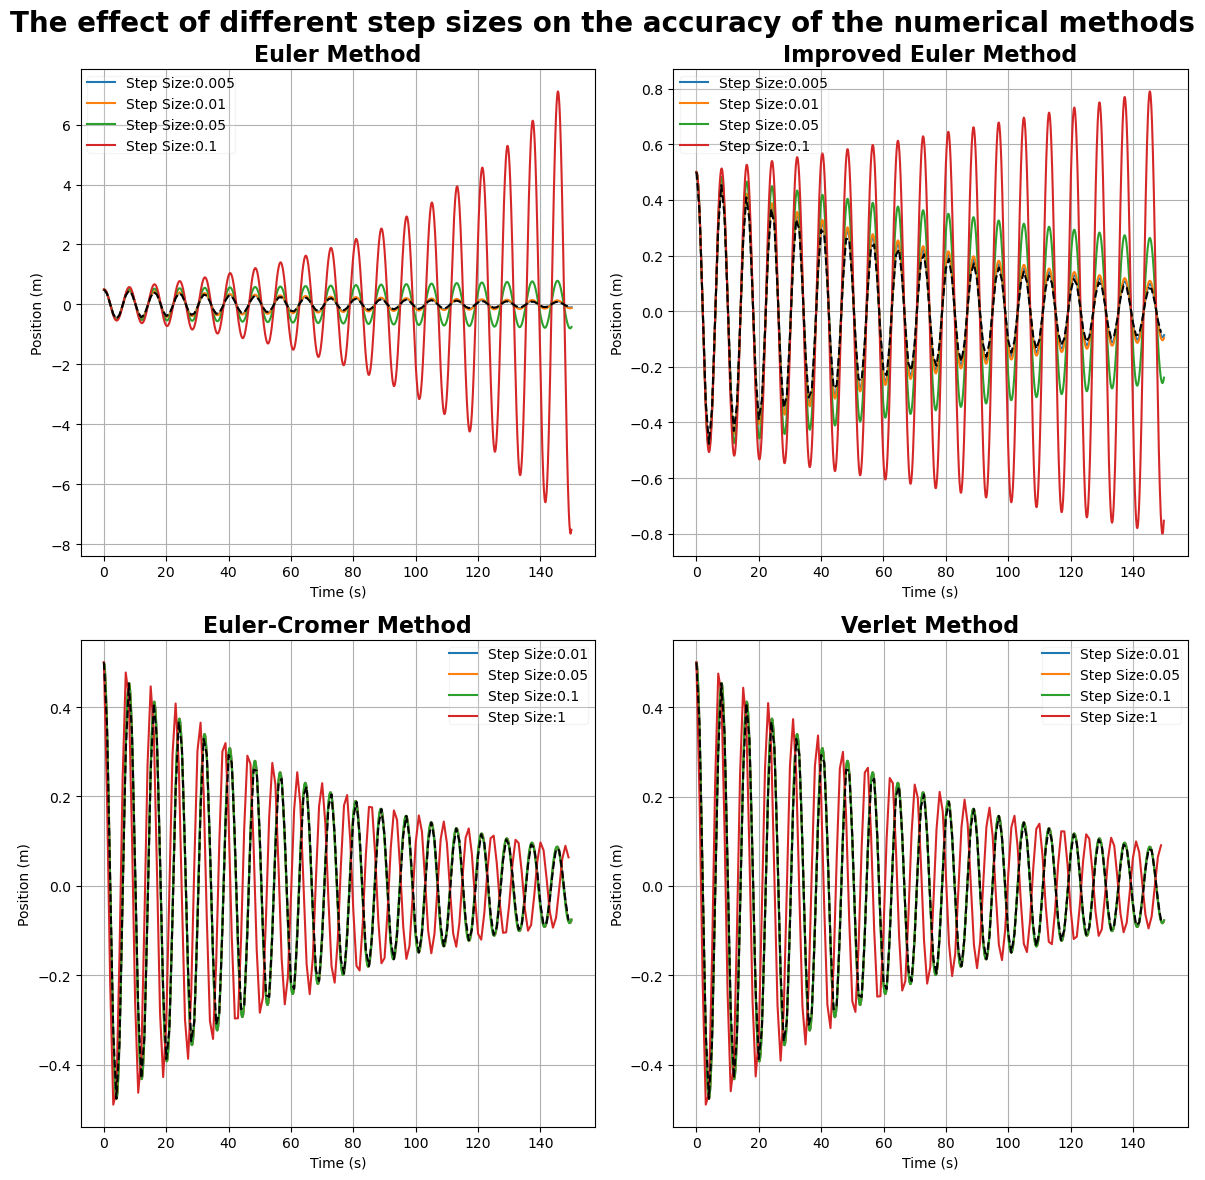

In [8]:
# Plots the numerical and analytical method solutions with respect to time
def NumericalMethodsPlotter():
    """
    Plots the numerical and analytical method solutions with respect to time. 
    This function uses four different numerical methods to solve a differential 
    equation and compares the accuracy of these methods with respect to different step sizes. 
    The function creates a 2x2 grid of subplots, where each subplot represents a different numerical method.

    Parameters:
    None

    Returns:
    None

    """
    
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('The effect of different step sizes on the accuracy of the numerical methods', fontweight='bold', fontsize=20)

    for hstep in h1:
        
            # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them 
            nsteps = int(T/hstep)
            
            # Calls the iterative method and plot it         
            x1, v1 = EulerMethod(x0, v0, nsteps, hstep)
            axs[0, 0].plot(np.arange(0,T,hstep), x1, label='Step Size:{}'.format(hstep))
            
            # Calls the iterative method and plot it         
            x2, v2 = ImprovedEulerMethod(x0, v0, nsteps, hstep)
            axs[0, 1].plot(np.arange(0,T,hstep), x2, label='Step Size:{}'.format(hstep))

    for hstep in h2:
        
            # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them 
            nsteps = int(T/hstep)
            
            # Calls the iterative method and plot it 
            x3, v3 = EulerCromerMethod(x0,v0,nsteps, hstep)
            axs[1, 0].plot(np.arange(0,T,hstep), x3, label='Step Size:{}'.format(hstep))
            
            # Calls the iterative method and plot it
            x4, v4 = VerletMethod(x0, v0, nsteps, hstep, b, False, 0)
            axs[1, 1].plot(np.arange(0,T,hstep), x4, label='Step Size:{}'.format(hstep))
            
    # Loops instructions to format the diagrams
    for i, label in zip([(0,0), (0,1), (1,0), (1,1)], ['Euler Method', 'Improved Euler Method', 'Euler-Cromer Method', 'Verlet Method']):        

        # Plots the analytic solution on all diagrams
        # Provides grids for all diagrams
        # Formats legends for all diagrams
        # Sets titles for all diagrams
        axs[i].plot(np.arange(0,T,hstep), Analytic(x0, v0, np.arange(0,T,hstep))[0].real, 'k--')
        axs[i].grid()
        axs[i].legend(loc='best',framealpha=0.2, borderpad=0)
        axs[i].set_title(label, fontweight='bold', fontsize=16)
        
    # Loops instructions to format the diagrams
    for ax in axs.flat:
        
        # Labels axes for all diagrams
        ax.set(xlabel='Time (s)', ylabel='Position (m)')

    # Adjusts spacing between subplots to minimize overlaps
    fig.tight_layout()
    plt.show()

NumericalMethodsPlotter()

As can be seen in the diagram above, the following stepsizes were used:

$h = (0.005, 0.01, 0.05, 0.1)s$ for Euler and improved Euler method,

$h = (0.01, 0.05, 0.1, 1)s$ for Euler-Cromer and Verlet method.

The reason why two sets of stepsizes were needed is because the Euler-Cromer method and Verlet method couldn't show any difference in accuracy to the analytical solution without $h = 1s$. As expected, the Euler and improved Euler method didn't conserve energy as the amplitude of oscillations can be seen to get larger at $h = 0.1s$.

With regards to the Euler-Cromer and Verlet method although $h = 1s$ allowed for differences to be seen between Euler-Cromer and Verlet, it was hard to distinguish the significance of the errors visually due to a phase shift that is likely caused by truncation error.

As we have calibrated and found a reasonable range for the stepsize however, we can make a more precise plot of position against stepsize which has been created in the next section. 

## Position against stepsize, $h$

In order to get a more conclusive finding on the accuracy of each method, residuals were plotted to with position against stepsizes. 

As the calibration showed that a stepsize of $1$ second is too big, a range of $50$ stepsizes between $0.01$ and $0.1$ second was chosen. The last position value created by each numerical method was found for each stepsize in order to minimise scatter deviations caused by the amplitude.

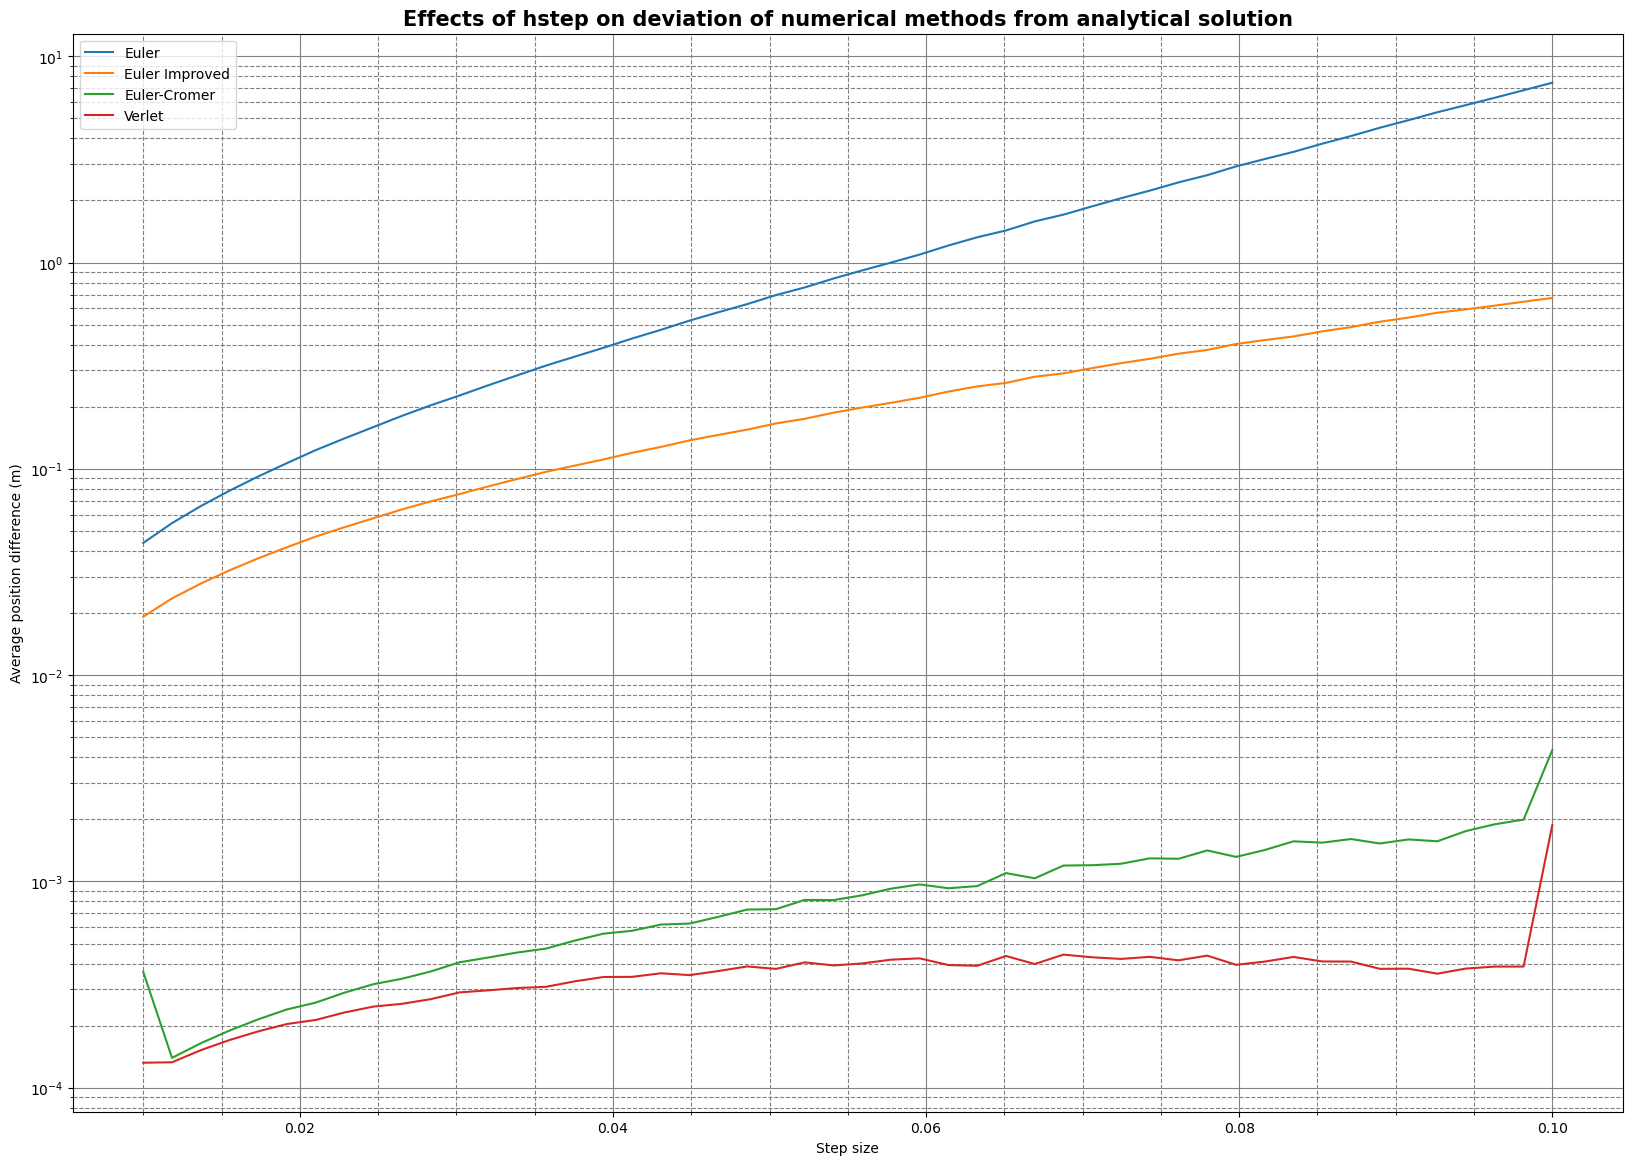

In [9]:
# Calls all numerical methods, get their x and v values. Uses last x value. 
# Plots that for a range of different hsteps 
def stepsize():
    """
    Calls all numerical methods and plots their deviation from the analytical solution as a function of the step size.
    
    Returns
    -------
    None
    
    Notes
    -----
    This function plots the deviation of each numerical method from the analytical solution as a function of the step size. The step sizes are given by the global variable `h3`. For each step size, the function calculates the x and v values using the Euler, Improved Euler, Euler-Cromer, and Verlet methods. It then calculates the average difference between the last position produced by each method and the corresponding position in the analytical solution. Finally, it plots the average position difference as a function of the step size for each method. The plot is shown using Matplotlib.
    
    See Also
    --------
    EulerMethod : numerical method for solving the equations of motion using the Euler method
    ImprovedEulerMethod : numerical method for solving the equations of motion using the Improved Euler method
    EulerCromerMethod : numerical method for solving the equations of motion using the Euler-Cromer method
    VerletMethod : numerical method for solving the equations of motion using the Verlet method
    Analytic : function for calculating the analytic solution of the equations of motion
    """
    
    # Creates empy arrays equal to the number of h3 stepsizes plotted for each numerical method
    AverageEulerPositionDifference = np.zeros((len(h3)))
    AverageImprovedEulerPositionDifference = np.zeros((len(h3)))
    AverageEulerCromerPositionDifference = np.zeros((len(h3)))
    AverageVerletPositionDifference = np.zeros((len(h3)))

    # Iterates over each value of h3
    for i in range(len(h3)):
        
        # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them
        nsteps = int(T/h3[i])

        # Produces the x and v values for each numerical method
        x1, v1 = EulerMethod(x0, v0, nsteps, h3[i])
        x2, v2 = ImprovedEulerMethod(x0, v0, nsteps, h3[i])
        x3, v3 = EulerCromerMethod(x0, v0, nsteps, h3[i])
        x4, v4 = VerletMethod(x0, v0, nsteps, h3[i], b, False, 0)
        
        # Produces the x values for the analytic solution
        InitialAnalytic = Analytic(x0, v0, np.arange(0, T, h3[i]))[0]

        # Finds the average difference between each numerical method against the analytical solution
        # Uses the last position produced in order to minimise scatter
        AverageEulerPositionDifference[i] = np.average(
            np.abs(x1[-1] - InitialAnalytic[-1]))
        AverageImprovedEulerPositionDifference[i] = np.average(
            np.abs(x2[-1] - InitialAnalytic[-1]))
        AverageEulerCromerPositionDifference[i] = np.average(
            np.abs(x3[-1] - InitialAnalytic[-1]))
        AverageVerletPositionDifference[i] = np.average(
            np.abs(x4[-1] - InitialAnalytic[-1]))

    # Plots all methods
    fig, axs = plt.subplots(1, 1, figsize=(20, 14))

    axs.plot(h3, AverageEulerPositionDifference, label='Euler')
    axs.plot(h3, AverageImprovedEulerPositionDifference, label='Euler Improved')
    axs.plot(h3, AverageEulerCromerPositionDifference, label='Euler-Cromer')
    axs.plot(h3, AverageVerletPositionDifference, label='Verlet')
    axs.grid(which='major', color='grey', linestyle='-')
    axs.grid(which='minor', color='grey', linestyle='--')
    axs.minorticks_on()
    axs.set_xlabel('Step size (s)')
    axs.set_ylabel('Average position difference (m)')
    axs.set_title('Effects of hstep on deviation of numerical methods from analytical solution',
                  fontsize=15, fontweight='bold')
    axs.legend(loc='best')
    axs.set_yscale('log')
    plt.show()

stepsize()

It can be seen on a log scale that the Verlet method is closest to the analytical solution closely followed by the Euler-Cromer. This confirms that because the Verlet method has a higher order truncation order than the rest of the integrators, it is the most accurate. 

As the Verlet method was the most accurate integrator out of the four numerical methods, it will be used to investigate the damped harmonic oscillator for the rest of this project.

The stepsize going forward will also be fixed to 0.1 second as although it shows the Verlet method getting worse, the difference is negligble for this task and it is the least computationally taxing value out of the range of stesizes that can be chosen.

## Different Types of damping

In damped harmonic oscillators, the solution usually differs depending on the $b$. This is because $b$ determines how quickly the oscillator loses energy to its surroundings and can cause the process to behave differently depending on whether the system is critically damped, underdamped, or overdamped.

A <b>critically damped system</b> is defined as one where 

$$ b_{critical} = 2\sqrt{km}.$$ 

It is expected for a critically damped system to reach equilibrium the fastest without any oscillations.
An <b>overdamped system</b> is defined as one where 

$$ b_{critical} > 2\sqrt{km}.$$

It is expected for an overdamped system to reach equilibrium the slowest with no oscillations.

Finally, an <b>underdamped system</b> is defined as one where
$$ b_{critical} < 2\sqrt{km}.$$

It is expected for an underdamped system to reach equilibrium faster than an overdamped system, but slower than a critically damped system. They are expected to oscillate as they reach equilibrium.

In order to observe the effects of all three damping on the harmonic motion of the spring, a diagram of position as a function of time was created with the a value twice $b_{critical}$ used for overdamped systems while a value half of $b_{critical}$ was used for underdamped systems.

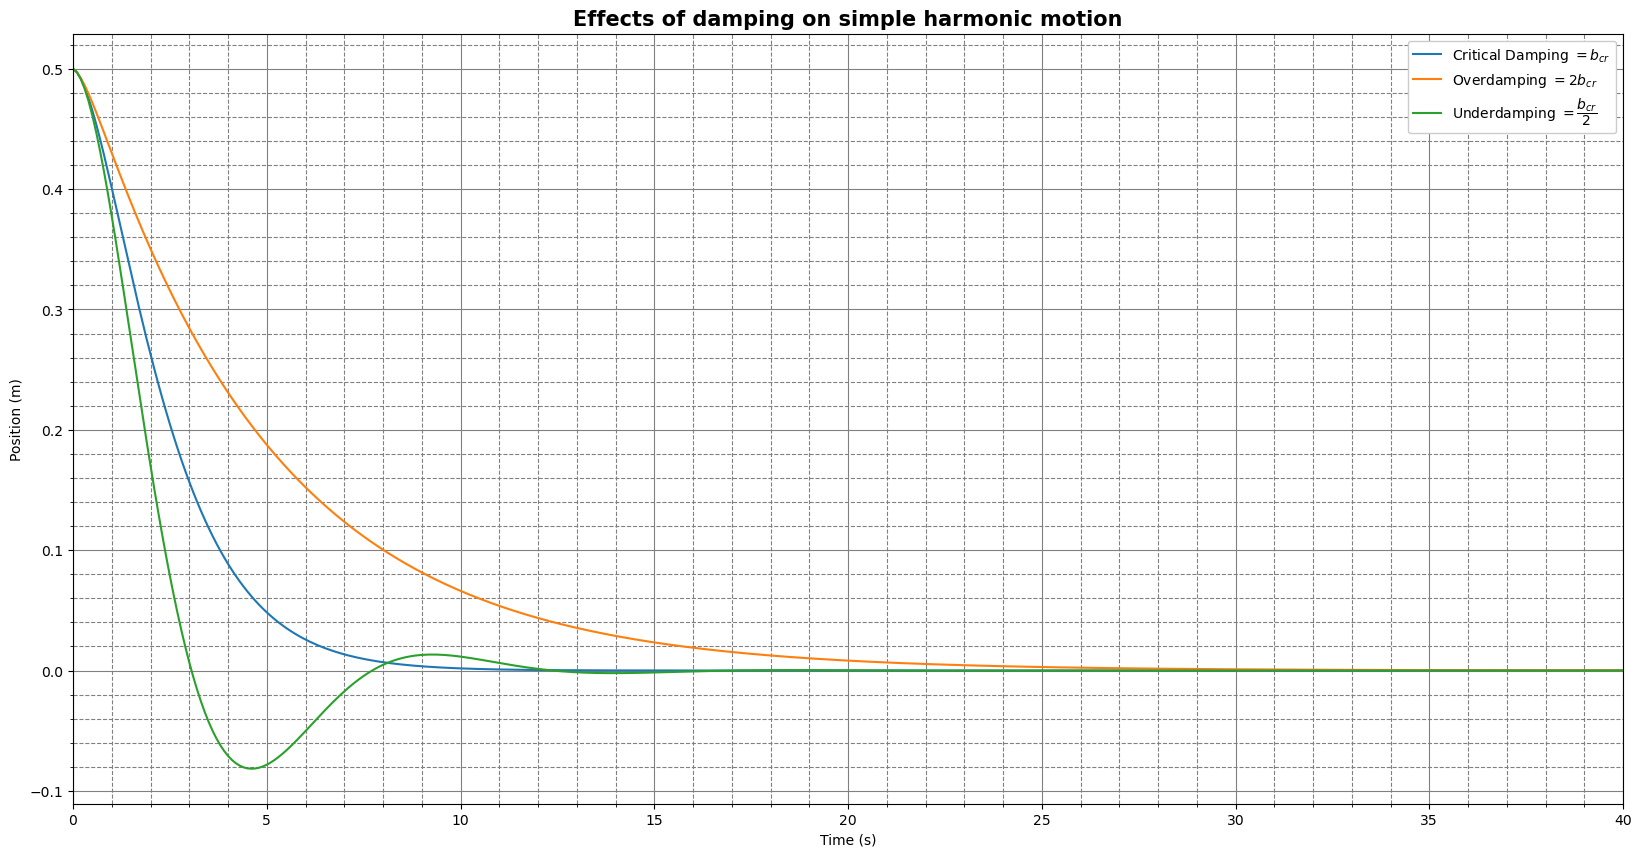

In [10]:
# Simulates the effect of underdamping, overdamping, and critical damping on a spring-mass system on a diagram
def damping():
    """
    Simulates the effect of underdamping, overdamping, and critical damping on a spring-mass system on a diagram.
    
    Parameters:
    -----------
    None
    
    Returns:
    --------
    None
    
    Output:
    -------
    A plot showing the position of the spring-mass system for different damping cases, including critical damping, overdamping, 
    and underdamping, using the Verlet method. The x-axis shows time in seconds, and the y-axis shows position in meters.
    """
    # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them
    nsteps = int(T/h4)

    # Finds the position for three types of damping using the Verlet Method
    critical_position = VerletMethod(x0, v0, nsteps, h4, critical_b, False, 0)[0]
    overdamped_position = VerletMethod(x0, v0, nsteps, h4, overdamped_b, False, 0)[0]
    underdamped_postition = VerletMethod(x0, v0, nsteps, h4, underdamped_b, False, 0)[0]

    # Plots all damping cases on one diagram with finer details added for ease of analysis  
    fig, axs = plt.subplots(1, figsize=(20, 10))
    axs.plot(np.arange(0, T, h4), critical_position, label='Critical Damping $ = b_{cr}$')
    axs.plot(np.arange(0, T, h4), overdamped_position, label='Overdamping $ = 2b_{cr}$')
    axs.plot(np.arange(0, T, h4), underdamped_postition, label='Underdamping $ = \dfrac{b_{cr}}{2}$')
    axs.set_xlim(0, 40)
    axs.grid(which='major', color='grey', linestyle='-')
    axs.grid(which='minor', color='grey', linestyle='--')
    axs.minorticks_on()
    axs.set_xlabel('Time (s)')
    axs.set_ylabel('Position (m)')
    axs.set_title('Effects of damping on simple harmonic motion',
                  fontsize=15, fontweight='bold')
    axs.legend(loc='best', framealpha=1)
    plt.show()

damping()

In line with expectations, the critically damped system reached equilibrium fastest followed by the underdamped system, then the overdamped system. Only the underdamped system oscillated as it reached equilibrium which is also in line with expectations.

## Applying Force

As we have investigated the behaviour of the spring-mass system without the external force term until now, we will finally proceed to study the system with the external force term reintroduced. 

Recalling the initial equation this project's goal it was to model <br>
<center>$m\frac{d^2x(t)}{dt^2} +  b\frac{dx(t)}{dt} + kx(t) = F(t)$,</center> 

the equation will be split into two sections of study. 

The case where a <b>sudden force</b> is applied which we notate using the dirac-delta function that sets the external force, $F_0$ to be $0$ at all points except when suddenly applied at $t= t_{sudden}$:<br> 
<center>$m\frac{d^2x(t)}{dt^2} +  b\frac{dx(t)}{dt} + kx(t) = F_0 \delta(t-t_{sudden})$.</center>

The case where a <b>constant periodic driving force</b> is applied as shown below:<br>
<center>$m\frac{d^2x(t)}{dt^2} +  b\frac{dx(t)}{dt} + kx(t) = F_0cos(wt)$.</center> 

where $w$ is the driving frequency.

### Investigating sudden application of an external force after a few oscillation periods

To investigate the effect of a sudden external force on the system, the Euler-Cromer method was used to calculate the solution of the system at the instantaneous moment the force was applied, followed by the usual Verlet method routine.

The force magnitude, direction, and time applied were varied between four diagrams to ensure that each factor can be studied independently from each other.

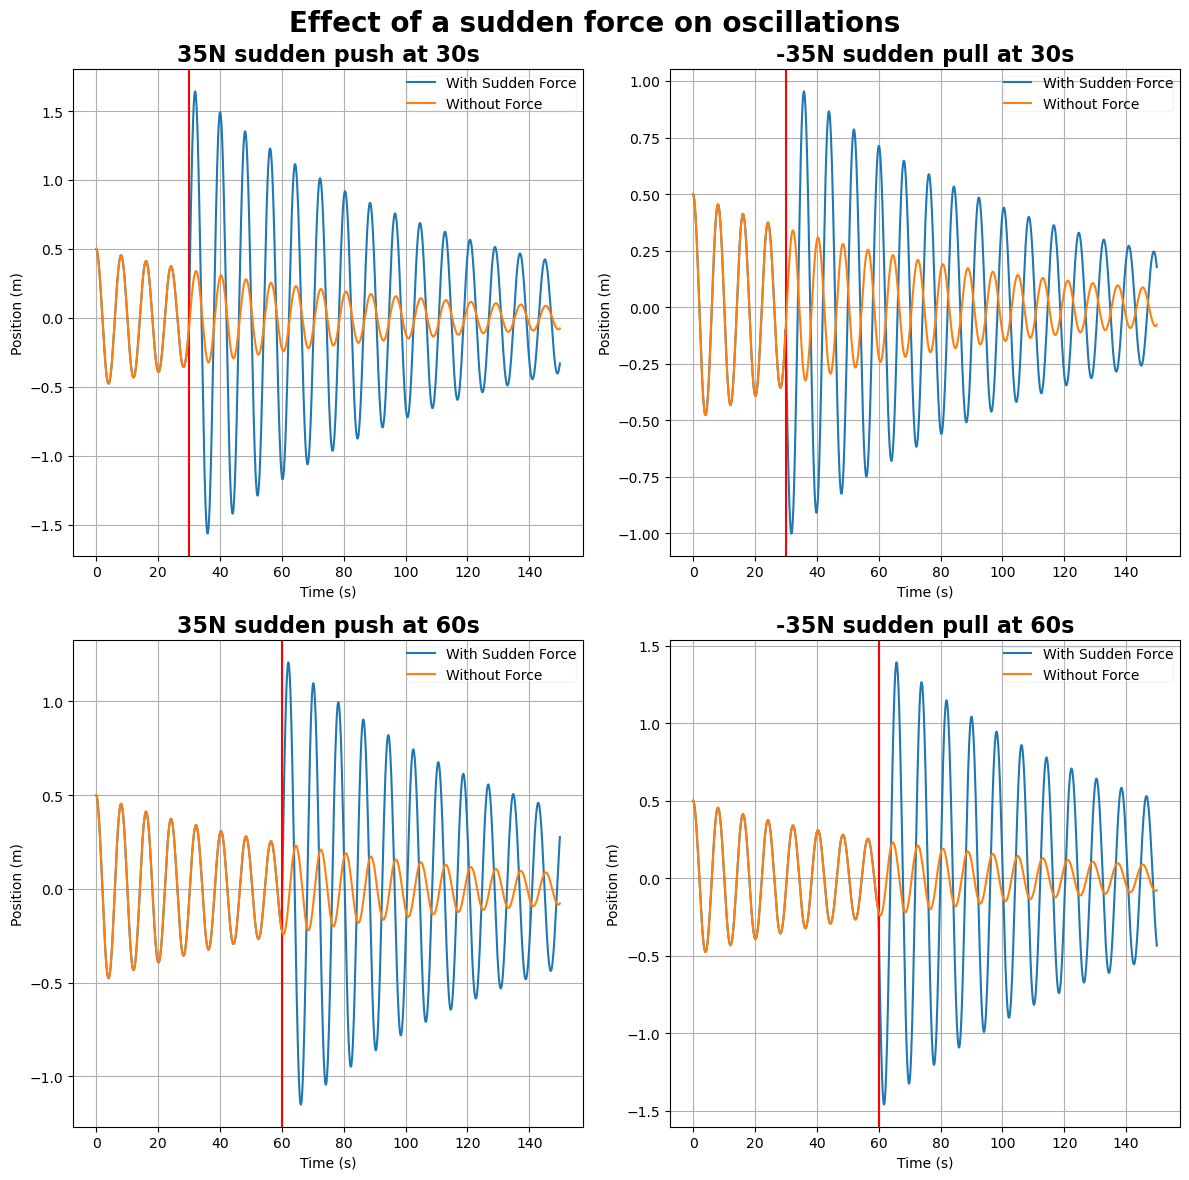

In [11]:
# Plots the behaviour of a damped harmonic oscillator with and without a force applied together
def sudden_force(push_or_pull_time, push_or_pull_force):
    """
    Plots the behavior of a damped harmonic oscillator with and without a force applied together.

    Parameters:
    -----------
    push_or_pull_time: tuple(float, float)
        A tuple of two floats representing the time periods for the external force to be applied.
    push_or_pull_force: tuple(float, float)
        A tuple of two floats representing the magnitude of the external force to be applied.

    Returns:
    --------
    None.
    """
    # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them
    nsteps = int(T/h4)
    
    # Determines the nsteps for each push and pull case for two time periods
    sudden_push_nstep1 = int(push_or_pull_time[0]/h4) - 1
    sudden_pull_nstep1 = int(push_or_pull_time[0]/h4) - 1
    sudden_push_nstep2 = int(push_or_pull_time[1]/h4) - 1
    sudden_pull_nstep2 = int(push_or_pull_time[1]/h4) - 1

    # Finds the positions of the spring mass after having an external force applied for each push and pull case for two time periods
    sudden_push_position1 = VerletMethod(
        x0, v0, nsteps, h4, b, sudden_push_nstep1, push_or_pull_force[0])[0]
    sudden_pull_position1 = VerletMethod(
        x0, v0, nsteps, h4, b, sudden_pull_nstep1, push_or_pull_force[1])[0]
    sudden_push_position2 = VerletMethod(
        x0, v0, nsteps, h4, b, sudden_push_nstep2, push_or_pull_force[0])[0]
    sudden_pull_position2 = VerletMethod(
        x0, v0, nsteps, h4, b, sudden_pull_nstep2, push_or_pull_force[1])[0]

    # Plots all external force cases with finer details added for ease of analysis  
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Effect of a sudden force on oscillations',
                 fontweight='bold', fontsize=20)

    axs[0][0].plot(np.arange(0, T, h4),
                   sudden_push_position1, label="With Sudden Force")
    axs[0][0].axvline(push_or_pull_time[0], color='red')

    axs[0][1].plot(np.arange(0, T, h4),
                   sudden_pull_position1, label="With Sudden Force")
    axs[0][1].axvline(push_or_pull_time[0], color='red')

    axs[1][0].plot(np.arange(0, T, h4),
                   sudden_push_position2, label="With Sudden Force")
    axs[1][0].axvline(push_or_pull_time[1], color='red')

    axs[1][1].plot(np.arange(0, T, h4),
                   sudden_pull_position2, label="With Sudden Force")
    axs[1][1].axvline(push_or_pull_time[1], color='red')

    # Loops instructions to format the diagrams
    for i, label in zip([(0, 0), (0, 1), (1, 0), (1, 1)], ['{0}N sudden push at {1}s'.format(push_or_pull_force[0], push_or_pull_time[0]), 
                                                           '{0}N sudden pull at {1}s'.format(push_or_pull_force[1], push_or_pull_time[0]), 
                                                           '{0}N sudden push at {1}s'.format(push_or_pull_force[0], push_or_pull_time[1]), 
                                                           '{0}N sudden pull at {1}s'.format(push_or_pull_force[1], push_or_pull_time[1])]):

        # Overlays the Verlet method solution with no external force as a control
        # Provides grids for all diagrams
        # Formats legends for all diagrams
        # Sets titles for all diagrams
        axs[i].plot(np.arange(0, T, h4), VerletMethod(
            x0, v0, nsteps, h4, b, False, 0)[0], label="Without Force")
        axs[i].grid()
        axs[i].legend(loc='best', framealpha=0.2, borderpad=0)
        axs[i].set_title(label, fontweight='bold', fontsize=16)

    # Loops instructions to format the diagrams
    for ax in axs.flat:
        ax.set(xlabel='Time (s)', ylabel='Position (m)')

    # Adjusts spacing between subplots to minimize overlaps
    fig.tight_layout()
    plt.show()


sudden_force(push_or_pull_time, push_or_pull_force)

The simulations show that at the time when the external force is applied, the amplitude gets bigger in line with expectations. 

The direction of force (push or pull) seems to affect whether the spring oscillates in the positive or negative direction regardless of the direction it was oscillating towards an instantaneous moment before force gets applied.

Depending on the time of the force applied, we can see a phase shift occurring between the oscillation with sudden force and oscillation without any force applied.

## Investigating application of a periodic external driving force 

Now, the behaviour of the spring-mass system under a periodic force will be examined. 

A force-driven damped harmonic oscillator will have a solution that is a combination of the transient part and steady-state part,

$$x(t) = x_{transient}(t) + x_{steady-state}(t).$$


The transient part is described by the same general solution for a non driven damped harmonic oscillator,<br>

<center>$x_{transient}(t) = e^\frac{-bt}{2m} (Ae^\frac{it\sqrt{4km-b^2}}{2m} + Be^\frac{-it\sqrt{4km-b^2}}{2m})$,</center>

while the steady-state has<br>

<center>$x_{steady-state}(t) = \frac{F_0} {m (w_0^2 - w^2)} e^{i(wt-\phi)}$,</center>

where $\phi$ is the phase angle between the position and the driving force which shows how much the spring's oscillation may be lagging or leading the driving force.

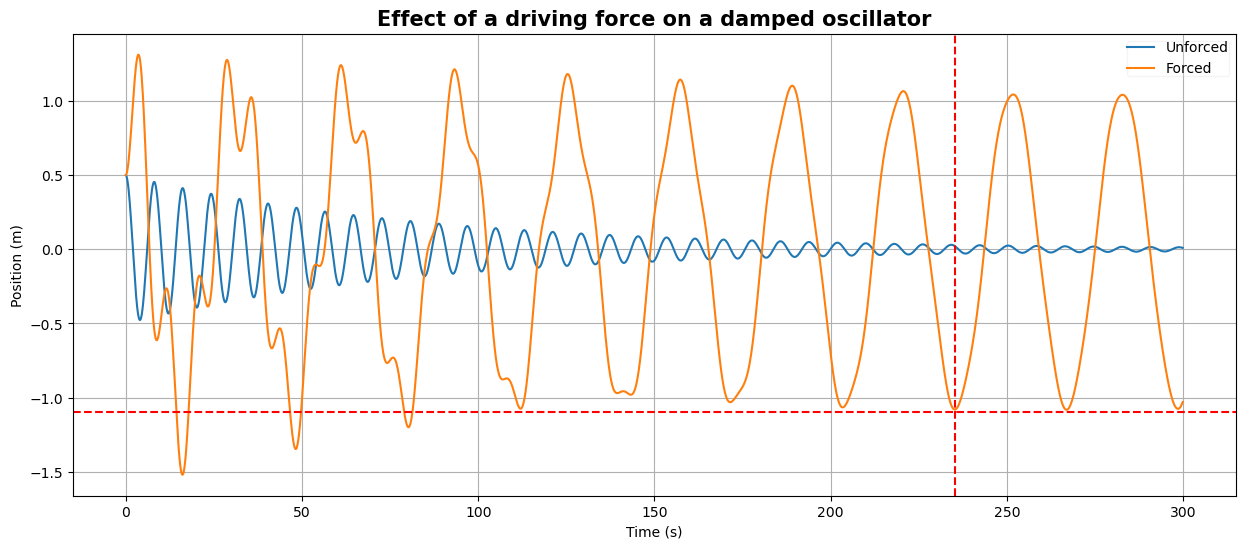

In [12]:
# Calculates the x and v values for when a periodic driving force is applied
def forced_damped_harmonic_oscillation(x0, v0, F0, nsteps, hstep, b, omega):
    """
    Calculates the position and velocity values of a forced damped harmonic oscillator given initial conditions, 
    the number of steps, step size, damping coefficient, driving force amplitude, and driving frequency.
    
    Args:
    x0 (float): initial position of the oscillator
    v0 (float): initial velocity of the oscillator
    F0 (float): amplitude of the driving force
    nsteps (int): number of steps for the simulation
    hstep (float): size of the step
    b (float): damping coefficient of the oscillator
    omega (float): driving frequency of the oscillator
    
    Returns:
    x (numpy.ndarray): array of position values for each step of the simulation
    v (numpy.ndarray): array of velocity values for each step of the simulation
    """
    # Calculates the periodic driving force applied for a range of time periods
    F = F0*np.cos(omega*np.arange(0, T2, hstep))

    # Creates empty arrays ready for the values of x, v, and a
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)
    a = np.zeros(nsteps)

    # Assigns initial conditions to the first value of the empty arrays
    x[0] = x0
    v[0] = v0
    a[0] = -(k/m)*x[0] - (b/m)*v[0] + (F[0]/m)

    # A local Verlet method has been created to tailor it to the forced damped harmonic oscillator
    for i in range(nsteps-1):
        
        # Constants that are used to calculate solutions using the Verlet method
        D = 2*m + b*hstep
        A = 2*(2*m-k*hstep**2)/D
        B = (b*hstep - 2*m)/D

        # The Euler-Cromer method being implemented in order to provide an initial position for the non self-starting Verlet Method
        if i == 0:
            
            # Calculates the acceleration at step i (in m/s)
            # Notice we don't make an array of these, as we usually don't need to remember them all
            # An additional factor of the force per mass has been included in the acceleration
            # Unlike the previous version of Euler -Cromer inside the Verlet method, the force here is iterable
            a = -(k/m)*x[i] - (b/m)*v[i] + F[i]/m
            v[i+1] = v[i] + a*hstep
            x[i+1] = x[i] + hstep*v[i+1]

        # Implementation of the Verlet method modified to include the periodic driving force
        else:
            x[i+1] = A*x[i] + B*x[i-1] + (2*F[i]*(hstep**2))/D
            v[i] = (x[i+1]-x[i-1])/(2*hstep)

    return x, v

# Plots the force-driven damped harmonic oscillation 
def forced_damped_harmonic_plot():
    """
    Plots the position values of a forced damped harmonic oscillator with respect to time for both the unforced 
    and forced cases. 
    
    Args:
    None
    
    Returns:
    None
    """
    # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them
    nsteps = int(T2/h4)
    
    # Finds the position for the forced damped harmonic oscillator
    forced_damped_harmonic_position = forced_damped_harmonic_oscillation(
        x0, v0, F0, nsteps, h4, b, w)[0]
    
    # Finds the position for the unforced damped harmonic oscillator
    unforced_damped_harmonic_position = forced_damped_harmonic_oscillation(
        x0, v0, 0, nsteps, h4, b, w)[0]
    
    # Plots driven and non driven cases together with finer details added for ease of analysis  
    fig, axs = plt.subplots(1, figsize=(15, 6))
    axs.plot(np.arange(0, T2, h4), unforced_damped_harmonic_position, label="Unforced")
    axs.plot(np.arange(0, T2, h4), forced_damped_harmonic_position, label="Forced")
    axs.legend(loc='best', framealpha=0.2, borderpad=0)
    axs.grid()
    axs.axhline(y=-1.1, color="red", linestyle="--")
    axs.axvline(x=235.3, color="red", linestyle="--")
    axs.set_xlabel('Time (s)')
    axs.set_ylabel('Position (m)')
    axs.set_title('Effect of a driving force on a damped oscillator',
                  fontsize=15, fontweight='bold')
    plt.show()

forced_damped_harmonic_plot()

As can be seen in the diagram above, the forced oscillation shows a transient state where the motion is complex and non uniform whereas the steady-state falls into uniform equilibrium. The switch from transient to steady-state can be seen at the cutoff point visualised by the dotted redlines. The horizontal line shows that the amplitude no longer changes perceptibly while the vertical line is a visual guide to help see the point where the steady-state begins.

The unforced oscillation amplitude decays towards $0$ meter since it is losing energy, however, because the force-driven oscillator has constant energy supplied periodically, it enters into the steady-state equilirbrium where the amplitude stays at an approximate position of 1.1 and -1.1 meter.

## Resonance

Finally, we will investigate the resonance of the system.


Resonance is the frequency at which an oscillating system produces the maximum amplitude possible.

When the system's driving frequency approaches the natural frequency, $w  \approx ω_0$, it is also known as the resonant frequency where the amplitude of the oscillations becomes very large. This is because the energy supplied by the external force is most efficiently transferred to the oscillating system.

Natural frequency is determined by the spring constant and mass,<br>

<center>$w_0 = \sqrt{\frac{k}{m}}$.</center>

This represents the frequency at which the undamped system would oscillate with no external forces acting upon it.

To find the resonance, we plot the amplitude of the system against a range of driving frequencies with the expectation that the peak will match the location of the natural frequency, calculated to be $0.78$ Hertz using the parameters defined at the beginning of the project.

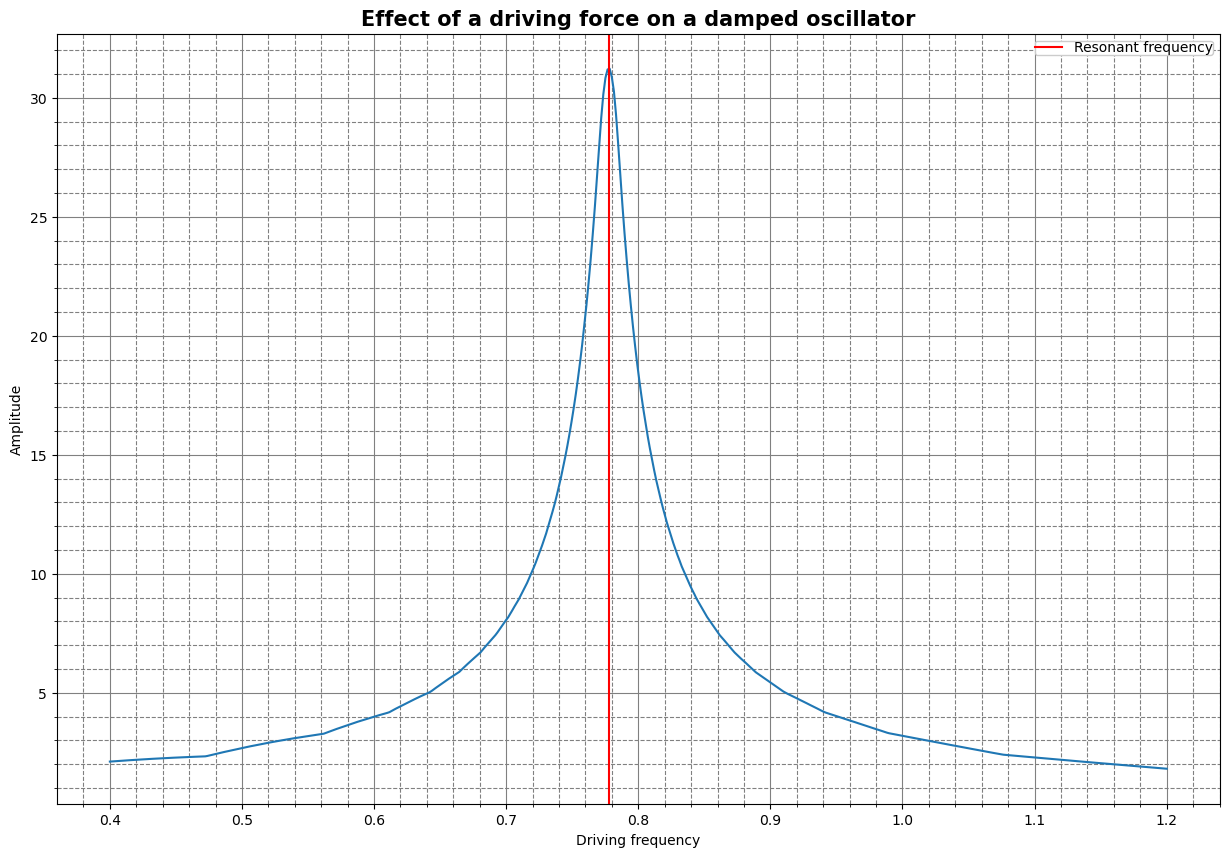

In [13]:
# Calculates the amplitude of a forced damped harmonic oscillation
def compute_amplitude(omega):
    """
    Calculates the amplitude of a forced damped harmonic oscillation.
    
    Parameters:
    -----------
    omega : float
        The angular frequency of the driving force.

    Returns:
    --------
    amplitude : float
        The maximum amplitude of the oscillation.
    """
    # Determines how many steps there are (values of i); we need to use int to ensure we have a whole number of them
    nsteps = int(T2/h4)

    # Finds x of forced_damped_harmonic_oscillation
    x = forced_damped_harmonic_oscillation(x0, v0, F0, nsteps, h4, b, omega)[0]

    # filters out x to only contain the amplitude of oscillations
    amplitude = np.max(np.abs(x))

    return amplitude

# Plots a diagram that shows resonance
def Resonance_plot():
    """
    Plots a diagram that shows resonance for a forced damped harmonic oscillator system.
    The plot shows the amplitude of oscillation as a function of the driving frequency,
    with a red vertical line indicating the resonant frequency.
    """
    # Computes the amplitude for each frequency in the range of angular frequencies defined between 0.4 and 1.2 Hz
    w_range = np.linspace(
        0.4, 1.2, 500)
    
    # Puts the calculated values of amplitudes into a list called amplitudes
    amplitudes = [compute_amplitude(omega)
                  for omega in w_range]
    
    # Plot the amplitude as a function of angular frequency with finer details added
    fig, axs = plt.subplots(1, figsize=(15, 10))
    axs.plot(w_range, amplitudes)
    axs.grid(which='major', color='grey', linestyle='-')
    axs.grid(which='minor', color='grey', linestyle='--')
    axs.minorticks_on()
    axs.axvline(w0, color='red', label="Resonant frequency")
    axs.legend(loc='best', framealpha=1, borderpad=0)
    axs.set_xlabel('Driving frequency (Hz)')
    axs.set_ylabel('Amplitude (m)')
    axs.set_title('Effect of a driving force on a damped oscillator',
                  fontsize=15, fontweight='bold')
    plt.show()

Resonance_plot()

As can be seen by the red line, we have confirmed that the resonant frequency matches the peak of the resonance curve and thus, the reliability of the theory.

## Conclusion

Overall, this project was a success in learning how to use numerical methods in order to simulate the damped spring-mass system. Within the constraints of the range of useful stepsizes, the Verlet method was the most accurate, followed by the Euler-Cromer, improved Euler, and Euler method. Harmonic oscillation behaviours such as damping and forced applications were evaluated and confirmed to be in line with theory as it has followed theoretically predicted expectations using a variety of different observations such as the comparison between forced and unforced damped oscillations and resonance.